In [2]:
from mpl_toolkits.basemap import Basemap

In [3]:
import numpy as np
import matplotlib.pyplot as plt

/Users/msmiller/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


                Geostationary, Orthographic or Azimuthal equidistant basemap
                

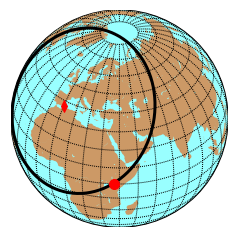

In [4]:
# create new figure, axes instances.
fig=plt.figure()

# setup mercator map projection.
m = Basemap(projection='ortho',lat_0=37,lon_0=40,resolution='l')
# plot bathymetry/topgraphy:
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')

# draw parallels
m.drawparallels(np.arange(-90,90,10),labels=[1,0,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,10),labels=[1,0,0,1])

# define the location of your seismic station, convert to map
# coordinates, and add it to the map:
statlon,statlat = 0, 37
mstatlon, mstatlat = m(statlon,statlat)
m.plot(mstatlon, mstatlat, 'rd', markersize=8)

# define the epicentral distance Delta and plot this as a circle on the map:
Delta = 50
m.tissot(statlon, statlat, Delta,100,zorder=10,edgecolor='black',linewidth=3,facecolor='none')

# define the epicentre of the earthquake, convert to map
# coordinates, and add it to the map:
EQlon, EQlat =m(37,0)
m.plot(EQlon, EQlat, 'ro', markersize=10,zorder=10)

plt.show()

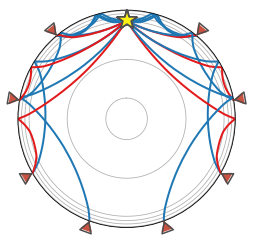

In [11]:
from obspy.taup.tau import plot_ray_paths
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax = plot_ray_paths(source_depth=600, ax=ax, fig=fig, phase_list=['PP', 'SP', 'SKP'],
                    npoints=10)

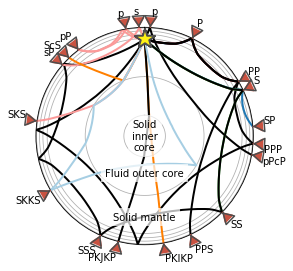

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from obspy.taup import TauPyModel


PHASES = [
    # Phase, distance
    ('P', 26),
    ('PP', 60),
    ('PPP', 94),
    ('PPS', 155),
    ('p', 3),
    ('pPcP', 100),
    ('PKIKP', 170),
    ('PKJKP', 194),
    ('S', 65),
    ('SP', 85),
    ('SS', 134.5),
    ('SSS', 204),
    ('p', -10),
    ('pP', -37.5),
    ('s', -3),
    ('sP', -49),
    ('ScS', -44),
    ('SKS', -82),
    ('SKKS', -120),
]

model = TauPyModel(model='iasp91')

fig, ax = plt.subplots(subplot_kw=dict(polar=True))

# Plot all pre-determined phases
for phase, distance in PHASES:
    arrivals = model.get_ray_paths(700, distance, phase_list=[phase])
    ax = arrivals.plot_rays(plot_type='spherical',
                            legend=False, label_arrivals=True,
                            plot_all=True,
                            show=False, ax=ax)

# Annotate regions
ax.text(0, 0, 'Solid\ninner\ncore',
        horizontalalignment='center', verticalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
ocr = (model.model.radius_of_planet -
       (model.model.s_mod.v_mod.iocb_depth +
        model.model.s_mod.v_mod.cmb_depth) / 2)
ax.text(np.deg2rad(180), ocr, 'Fluid outer core',
        horizontalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
mr = model.model.radius_of_planet - model.model.s_mod.v_mod.cmb_depth / 2
ax.text(np.deg2rad(180), mr, 'Solid mantle',
        horizontalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.show()